# Linear regression and introduction to dummy variables and one hot encoding
1) Understand the Problem or situation or create a hypothesis. 
2) Obtain the data or extract the data 
3) Data cleaning or Data prep
4) Explore the data
5) Feature Selection
6) Algorithm Selection
7) Tuning the Model
8) Evaluating the Model
9) Presentation

scikit-learn's 6-step modeling pattern Takes place in Step 5,6,7,8

Step 1: Create a feature matrix and response vector

Step 2: Decide on the estimator you want to to use and import that class

Step 3: "Instantiate" the "estimator"

Step 4: Fit the model with data (aka "model training")

Step 5: Use the model to predict the response for a new observation

Step 6: Evaluate the error or accuracy of the model

# Linear Regression

Comparing linear regression with other models

Advantages of linear regression:

    Simple to explain
    Highly interpretable
    Model training and prediction are fast
    No tuning is required (excluding regularization)
    Features don't need scaling
    Can perform well with a small number of observations
    Well-understood

Disadvantages of linear regression:

    Presumes a linear relationship between the features and the response
    Performance is (generally) not competitive with the best supervised learning methods due to high bias
    Can't automatically learn feature interactions

In simple terms it is the relationship between two variables
Another way to think of it is the value of the dependent variable at certain value of the independent variable.


In [ ]:
Minutes = [100,150,200,300,350,400,450]
Grade = [3,4,5,7,8,9,10]

In [ ]:
import seaborn as sns
sns.scatterplot(x = Minutes, y = Grade)

We dont have this data point but we want to inform students that if they studied more than 200 minutes like maybe 250 minutes they could hypothetically get a grade of???

In [ ]:
Minutes = [100,100,150,98,103,350,195,205,200,300,310,350, 400,450, 435]
Grade = [3,3.3,4,3.4,3,8,5,4.9,5,7,6.5, 8.6, 9,10, 9.9]

In [ ]:
sns.scatterplot(x = Minutes, y = Grade)

In [ ]:
Minutes = [100,150,200,300,350,400,450,150]
Grade = [3,4,5,7,8,9,10,9.6]

In [ ]:
sns.scatterplot(x = Minutes, y = Grade)

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//Student_Grade.csv')
df

In [ ]:
sns.scatterplot(data = df, x = 'Study Time In Minutes', y = 'Credit Grade')

In [ ]:
sns.lmplot(x ="Study Time In Minutes", y ="Credit Grade", data = df, aspect=1.5, scatter_kws={'alpha':0.2})

Steps for modeling
- Step 1: Understanding the Problem.
- Step 2: Data Extraction.
- Step 3: Data Cleaning.
- Step 4: Exploratory Data Analysis.
- Step 5: Feature Selection. <--- you are here
- Step 6: Incorporating Machine Learning Algorithms. <-- and here
- Step 7: Testing the Models. <-- and here
- Step 8: Deploying the Model. 

### Step 1: Understanding the Problem.
If you study more then your grades will be better.

### Step 2: Data Extraction

In [ ]:

# lets first start by importing All the Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as linreg

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np 

# Data Extraction
df = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//Student_Grade.csv')
df

### Step 3: Data Cleaning.

In [ ]:
 # Step 3: Data Cleaning.
'''Data cleansing can be an extensive and iterative process, 
this can involve removing duplicates, removing or working with Nans and zeros. 
renaming fields, accounting for outliers and more. For now we will keep it simple with 
A)Selecting attributes we are interested in(some tables will have lots of attributes and we may want to 
isolate to a few)
B) Renaming fields for ease of use or readability
'''
# Select the two attributes intrested in
df2 = df[['Study Time In Minutes', 'Credit Grade']]
# Rename attributes if needed
df2.rename(columns={'Study Time In Minutes':'Study Min', 'Credit Grade':'Grade'}, inplace=True)
df2.columns

### Step 4 EDA
Just like with most of these steps there can be a lot of visualizations and work done in the EDA section. For just getting the flow down we will limit it to one visualization.
EDA can often times lead to discoveries and more data cleansing. 

In [ ]:
sns.lmplot(x ="Study Min", y ="Grade", data = df2, aspect=1.5, scatter_kws={'alpha':0.2})

### Step 5 Feature Selection
In this example there is only one feature to select in future examples there will be more features. 
If you have 10 attributes you may want to keep them in your data set but only test or model 3 of them as 
your feature selection.

In [ ]:
features = df2[['Study Min']]
target = df2[['Grade']]

In [ ]:
# Fit the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

In [ ]:
## Evaluate the model
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-Squared (R\u00b2): {:.2f}%'.format(r2 * 100))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Mean Absolute Error:{:.2f}'.format(mae))



- R-Square/Adjusted R square
R-squared, also known as the coefficient of determination, is a widely used metric to assess the goodness-of-fit of a linear regression model. It represents the proportion of the variance in the dependent variable that is explained by the independent variables.

- Mean Square Error(MSE)/Root Mean Square Error(RMSE)
Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). 
However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).

- Mean Absolute Error MAE
To put it in short, if there are many outliers then you may consider using Mean Absolute Error (also called the Average Absolute Deviation). RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

Some detail review of regression model evaluation tools and techniques along with some of the back end statistics. 


https://medium.com/the-modern-scientist/a-dive-into-regression-models-evaluation-310e60658011

https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error


In [ ]:
# Make a prediction
y_pred_test = model.predict(X_test)
y_pred = model.predict(X_train)

In [ ]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightgreen')
plt.plot(X_train, y_pred_train, color = 'red')
plt.title('Does Study time increase chance of better grades?')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.legend(['X_train/Pred(y_test)', 
            'X_train/y_train'], 
           title = 'Grade/StudyTime', 
           loc='best', 
           facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightgreen')
plt.plot(X_train, y_pred_train, color = 'red')
plt.title('Does Study time increase chance of better grades?')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], 
           title = 'Grade/StudyTime', 
           loc='best', 
           facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# print the coefficients# the value of y in x = 0 
# so if a person studied 0 minutes 
print("intercept: or if a person studied 0 minutes what would be their score",model.intercept_)
print("coef: what is each step for each minute studied as it effects grade",model.coef_)

In all these cases, the y-intercept provides a baseline value for the dependent variable, against which changes in the independent variable can be compared. It's an essential part of understanding the relationship between the two variables, and can often provide important insights into the system being studied.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.



## Dummy Variables and One-hot encoding
These are two different methods that have the same outcomes but can provide slight difference in benefits. 
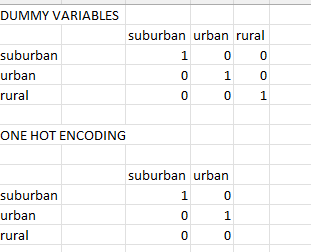

In [ ]:
import pandas as pd
#create DataFrame
df = pd.DataFrame({'area': ['rural', 'rural', 'urban', 'urban', 'suburban', 'suburban', 'rural', 'urban'],
                   'rating': [25, 12, 15, 14, 19, 23, 25, 29]})
pd.get_dummies(df)

In [ ]:
import pandas as pd
#create DataFrame
df2 = pd.DataFrame({'area': ['rural', 'rural', 'urban', 'urban', 'suburban', 'suburban', 'rural', 'urban'],
                   'rating': [25, 12, 15, 14, 19, 23, 25, 29]})
#view DataFrame
print(df) 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df2[['area']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df2.join(encoder_df)

#view final df
print(final_df)

### Classic BIKESHARE example (putting it all together)

# What is the bikeshare dataset
We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition.

In [ ]:
# reading in the data set and setting the datetime as the index
df = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//bikeshare.csv', 
                 index_col='datetime', 
                 parse_dates=True)
df

In [ ]:
df.dtypes

In [ ]:
df.index

Questions:
    How many Features are there
    What does each observation represent?
    What is the response variable?
    Where does your curiosity guide you?

Are there blanks?
Are there duplicates?
Are there fields that could be dropped or renamed?

In [ ]:
# "count" is a method, so it's best to name that column something else
df.rename(columns={'count':'total'}, inplace=True)
df.columns


### Visualizing the data

In [ ]:
# Pandas scatter plot
df.plot(kind='scatter', x='temp', y='total', alpha=0.2)

In [ ]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=df, aspect=1.5, scatter_kws={'alpha':0.2})


Building a simple linear regression model (one feature)

For our first task we decide to create a model which will predict the number of rentals based on the temperature.


In [ ]:
# create X and y
feature_cols = ['temp']
X = df[feature_cols]
y = df.total
X.shape

In [ ]:
type(X)

In [ ]:
y.shape

In [ ]:
type(y)

In [ ]:
# We have created our X (feature matrix) and Y (response vector so now lets:
# import our chosen estimator, instantiate it into a variable, fit the model with the X and y
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

In [ ]:
type(linreg)

In [ ]:
# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

Visualizing the data 

In [ ]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [ ]:
# multiple scatter plots in Seaborn
sns.pairplot(df, x_vars=feature_cols, y_vars='total', kind='reg')

In [ ]:
# multiple scatter plots in matplotlib
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

What are your observations?

In [ ]:
# cross-tabulation of season and month
pd.crosstab(df.season, df.index.month)

In [ ]:
# box plot of rentals, grouped by season
df.boxplot(column='total', by='season')

In [ ]:
# line plot of rentals
df.total.plot()



What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing overall growth and the winter months happen to come after the spring months.


In [ ]:
# correlation matrix (ranges from 1 to -1)
df.corr()

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df.corr())

What relationships do you notice?
Adding more features to the model

In [ ]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

# create X and y
X = df[feature_cols]
y = df.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

Python's zip() function creates an iterator that will aggregate elements from two or more iterables. You can use the resulting iterator to quickly and consistently solve common programming problems, like creating dictionaries.


Feature selection

How do we choose which features to include in the model? We're going to use train/test split (and eventually cross-validation).

Why not use of p-values or R-squared for feature selection?

    Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
    Features that are unrelated to the response can still have significant p-values.
    Adding features to your model that are unrelated to the response will always increase the R-squared value, and adjusted R-squared does not sufficiently account for this.
    p-values and R-squared are proxies for our goal of generalization, whereas train/test split and cross-validation attempt to directly estimate how well the model will generalize to out-of-sample data.

More generally:

    There are different methodologies that can be used for solving any given data science problem, and this course follows a machine learning methodology.
    This course focuses on general purpose approaches that can be applied to any model, rather than model-specific approaches.

Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
    Mean Squared Error (MSE) is the mean of the squared errors:
        Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

In [ ]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

Comparing these metrics:

    MAE is the easiest to understand, because it's the average error.
    MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
    RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:


In [ ]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))


Comparing models with train/test split and RMSE

In [ ]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
train_test_split(X, y, random_state=123)

In [ ]:
# compare different sets of features
print(train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(['temp', 'season', 'weather']))
print(train_test_rmse(['temp', 'season', 'humidity']))
print(train_test_rmse(['temp', 'humidity']))



In [ ]:
# using these as features is not allowed!
print(train_test_rmse(['casual', 'registered']))

Comparing testing RMSE with null RMSE
Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null



In [ ]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

    Ordered categories: transform them to sensible numeric values (example: small=1, medium=2, large=3)
    Unordered categories: use dummy encoding (0/1)

What are the categorical features in our dataset?

    Ordered categories: weather (already encoded with sensible numeric values)
    Unordered categories: season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an ordered relationship. Instead, we create multiple dummy variables:


In [ ]:
# create dummy variables
season_dummies = pd.get_dummies(df.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)



However, we actually only need three dummy variables (not four), and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the baseline level:


In [ ]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)



In general, if you have a categorical feature with k possible values, you create k-1 dummy variables.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, season_dummies], axis=1)

In [ ]:
# print 5 random rows
df.sample(n=5, random_state=1)

In [ ]:
# include dummy variables for season in the model
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = df[feature_cols]
y = df.total
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))


How do we interpret the season coefficients? They are measured against the baseline (spring):

    Holding all other features fixed, summer is associated with a rental decrease of 3.39 bikes compared to the spring.
    Holding all other features fixed, fall is associated with a rental decrease of 41.7 bikes compared to the spring.
    Holding all other features fixed, winter is associated with a rental increase of 64.4 bikes compared to the spring.

Would it matter if we changed which season was defined as the baseline?

    No, it would simply change our interpretation of the coefficients.

Important: Dummy encoding is relevant for all machine learning models, not just linear regression models.


In [ ]:
# compare original season variable with dummy variables
#print(train_test_rmse(['temp', 'season', 'humidity']))
print(train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

In [ ]:
# create dummy variables
season_dummies = pd.get_dummies(df.season, dtype=int, prefix='season')
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, season_dummies], axis=1)
# print 5 random rows
df.sample(n=5, random_state=1)

In [ ]:
df.columns

In [ ]:
feature_cols = ['temp','season', 'season_1' ,'season_2', 'season_3', 'season_4', 'humidity']
feature_cols

In [ ]:
df[feature_cols]

In [ ]:
# include dummy variables for season in the model
# include dummy variables for season in the model
feature_cols = ['temp','season', 'season_2', 'season_3', 'season_4', 'humidity']
X = df[feature_cols]
y = df.total
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))
# compare original season variable with dummy variables
print(train_test_rmse(['temp', 'season', 'humidity']))
print(train_test_rmse(['temp','season_2','season_3', 'season_4', 'humidity']))

#### Challenges
Feature engineering

See if you can create the following features:

    hour: as a single numeric feature (0 through 23)
    hour: as a categorical feature (use 23 dummy variables)
    daytime: as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with train_test_rmse to see which one performs the best!


Comparing linear regression with other models
 
Advantages of linear regression:
 
- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:
 
- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions

In [ ]:
# hour as a numeric feature

In [ ]:
# daytime as a categorical feature



In [ ]:
# hour as a categorical feature



### Bonus 

Anscombe's Quartet

In a 1973 paper, Graphs in Statistical Analysis, published in The American Statistician, Vol. 27, No. 1. (Feb., 1973), pp. 17-21, statistician Francis Anscombe provided the briefiest of abstracts: "Graphs are essential to good statistical analysis".

His paper opened with a brief meditation on the usefulness of graphs:

"Most textbooks on statistical methods, and most statistical computer programs, pay too little attention to graphs. Few of us escape being indoctrinated with these notions:

    numerical calculations are exact, but graphs are rough;
    for any particular kind of statistical data there is just one set of calculations constituting a correct statistical analysis;
    performing intricate calculations is virtuous, whereas actually looking at the data is cheating.

A computer should make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding.

Graphs can have various purposes, such as: (i) to help us perceive and appreciate some broad features of the data, (ii) to let us look behind those broad features and see what else is there. Most kinds of statistical calculation rest on assumptions about the behavior of the data. Those assumptions may be false, and then the calculations may be misleading. We ought always to try to check whether the assumptions are reasonably correct; and if they are wrong we ought to be able to perceive in what ways they are wrong. Graphs are very valuable for these purposes.

Good statistical analysis is not a purely routine matter, and generally calls for more than one pass through the computer. The analysis should be sensitive both to peculiar features in the given numbers and also to whatever background information is available about the variables. The latter is particularly helpful in suggesting alternative ways of setting up the analysis. Thought and ingenuity devoted to devising good graphs are likely to pay off. Many ideas can be gleaned from the literature..."


In [ ]:
####!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 28 13:41:39 2015

@author: jim_byers
# Heavily leveraged from matplotlib example with slight changes:
# http://matplotlib.org/examples/pylab_examples/anscombe.html
# Description and Anscrombe quote are from:
#    http://nbviewer.ipython.org/github/psychemedia/ou-tm351/blob/master/notebooks-RFC/Anscombe's%20Quartet%20%5Bopen%5D.ipynb

"""

from __future__ import print_function
"""
Edward Tufte uses this example from Anscombe to show 4 datasets of x
and y that have the same mean, standard deviation, and regression
line, but which are qualitatively different.

matplotlib fun for a rainy day
"""

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Implement Anscombe dataset values into arrays
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


def fit(x):
    return 3 + 0.5*x

# plt.set_marker('circle')
xfit = np.array([np.amin(x), np.amax(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2, marker='o', markerfacecolor = '.25', markeredgecolor = '0', color='b')
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2, marker='o', markerfacecolor = '.25', markeredgecolor = '0', color='b')
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), yticklabels=[], xticks=(0, 10, 20))
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2, marker='o', markerfacecolor = '.25', markeredgecolor = '0', color='b')
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)

xfit = np.array([np.amin(x4), np.amax(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2, marker='o', markerfacecolor = '.25', markeredgecolor = '0', color='b')
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y), np.corrcoef(x, y)[0][1]))

plt.show()